In [1]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [109]:
years = ['2004','2005','2006','2007','2008','2009','2010','2011','2012']#,'2018']
len(years)

9

In [110]:
data = []
for year in years:
    website_url = requests.get('https://www.basketball-reference.com/players/j/jamesle01/gamelog/'+year)
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        data.append(cell.get_text())

In [111]:
#import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))
refined

array([['1', '2003-10-29', '18-303', ..., '25', '24.7', '-9'],
       ['2', '2003-10-30', '18-304', ..., '21', '14.7', '-3'],
       ['3', '2003-11-01', '18-306', ..., '8', '5.0', '-21'],
       ...,
       ['60', '2012-04-18', '27-110', ..., '28', '23.2', '+20'],
       ['61', '2012-04-19', '27-111', ..., '27', '22.8', '+11'],
       ['62', '2012-04-22', '27-114', ..., '32', '24.6', '+12']],
      dtype='<U10')

In [112]:
#fix the issue with the other years later

In [113]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')    
print(headers)

['G', 'Date', 'Age', 'Tm', '\xa0', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [114]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,18-303,CLE,@,SAC,L (-14),1,42:00,12,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,18-304,CLE,@,PHO,L (-9),1,41:00,8,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,18-306,CLE,@,POR,L (-19),1,39:00,3,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,18-310,CLE,,DEN,L (-4),1,41:00,3,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,18-312,CLE,@,IND,L (-1),1,44:00,8,...,5,5,3,0,0,7,2,23,9.0,-7


In [115]:
df1 = df1.drop(['\xa0', '\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,Opp,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,SAC,42:00,12,20,.600,0,2,.000,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,PHO,41:00,8,17,.471,1,5,.200,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,POR,39:00,3,12,.250,0,1,.000,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,DEN,41:00,3,11,.273,0,2,.000,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,IND,44:00,8,18,.444,1,2,.500,...,5,5,3,0,0,7,2,23,9.0,-7


## Correlation Matrix

In [116]:
df2 = df1.drop(['Date', 'Opp', 'MP', '+/-'], axis=1)

In [117]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,1,12,20,.600,0,2,.000,1,3,.333,2,4,6,9,4,0,2,3,24.7,25
1,2,8,17,.471,1,5,.200,4,7,.571,2,10,12,8,1,0,7,1,14.7,21
2,3,3,12,.250,0,1,.000,2,2,1.000,0,4,4,6,2,0,2,3,5.0,8
3,4,3,11,.273,0,2,.000,1,1,1.000,2,9,11,7,2,3,2,1,11.2,7
4,5,8,18,.444,1,2,.500,6,7,.857,0,5,5,3,0,0,7,2,9.0,23


In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

AxesSubplot(0.127273,0.125;0.617727x0.755)


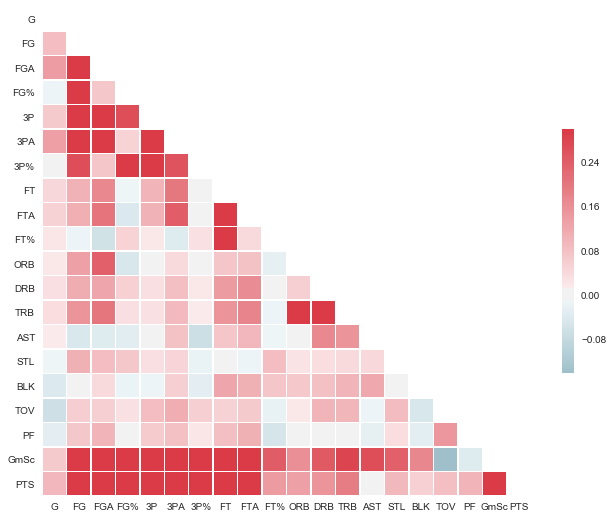

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [120]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,-1.695307,0.660938,-0.081052,1.082158,-0.958452,-0.839527,-1.133468,-1.517029,-1.283767,-2.310279,0.654144,-0.727431,-0.395553,0.781809,1.667941,-0.888760,-0.74979,0.822840,0.315937,-0.788594
1,-1.650660,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,0.654144,1.525154,1.625730,0.410315,-0.539251,-0.888760,2.05480,-0.713574,-0.898662,-2.332176
2,-1.606012,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,-1.059564,-0.727431,-1.069315,-0.332673,0.196480,-0.888760,-0.74979,0.822840,-2.076822,-2.450913
3,-1.561365,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,0.654144,1.149723,1.288849,0.038821,0.196480,2.267712,-0.74979,-0.713574,-1.323771,-0.551119
4,-1.516718,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,-1.059564,-0.352000,-0.732434,-1.447155,-1.274982,-0.888760,2.05480,0.054633,-1.590982,-1.263542


AxesSubplot(0.127273,0.125;0.617727x0.755)


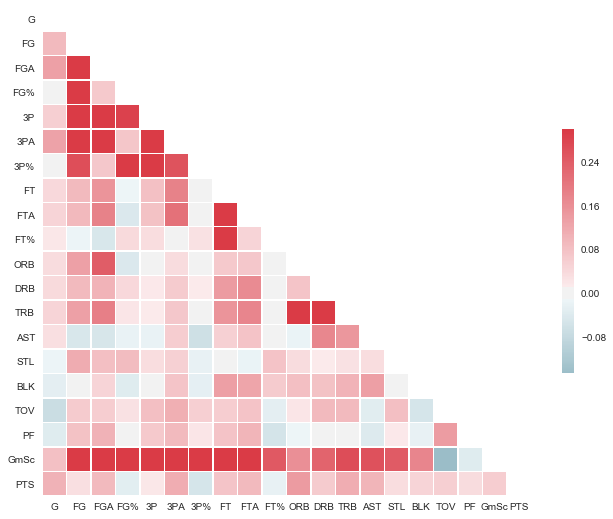

In [121]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

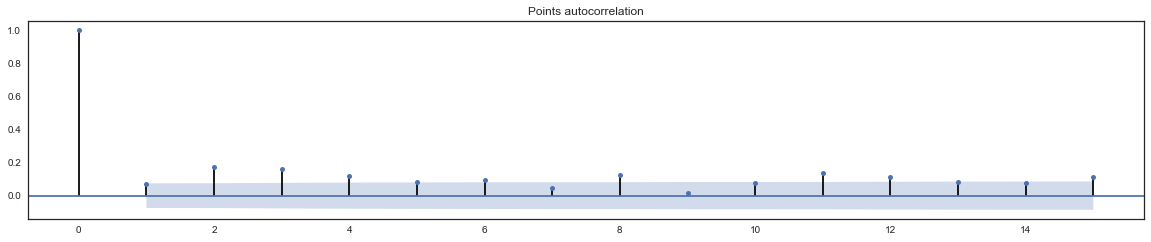

In [122]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

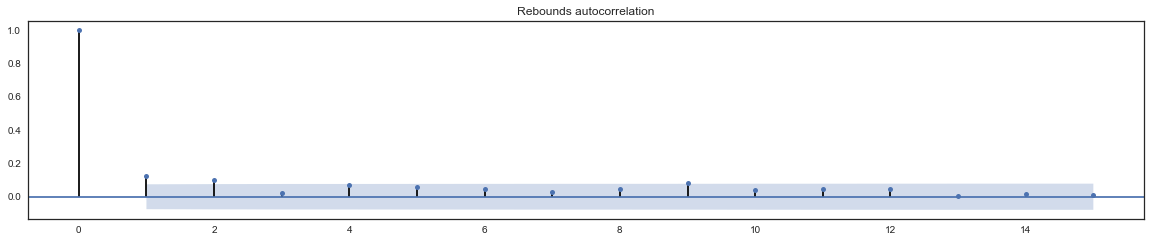

In [123]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

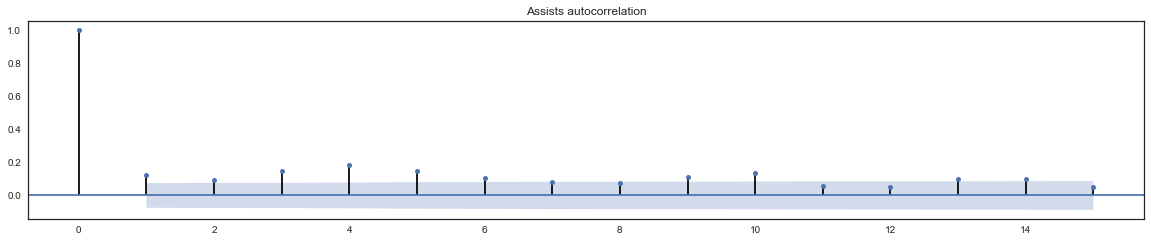

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

## Trend Analysis

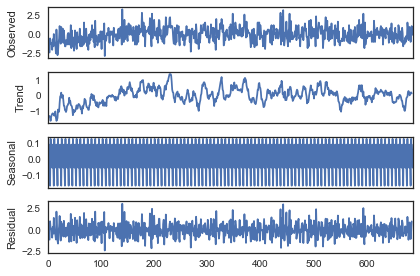

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

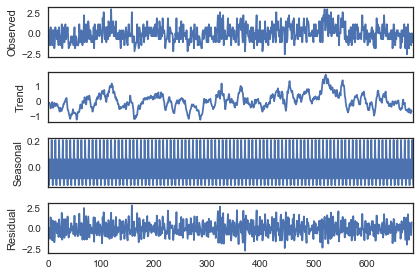

In [126]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

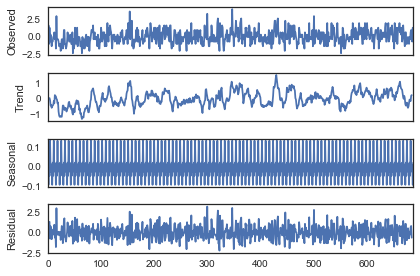

In [127]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [128]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']

In [129]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Week'] = df2['Date'].dt.week
df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,GmSc,PTS,Date,Opp,Year,Month,Week,Yearday,Rest
1,-1.650660,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,-0.713574,-0.898662,-0.788594,2003-10-30,PHO,2003,10,44,303,1.0
2,-1.606012,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,0.822840,-2.076822,-2.332176,2003-11-01,POR,2003,11,44,305,2.0
3,-1.561365,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,-0.713574,-1.323771,-2.450913,2003-11-05,DEN,2003,11,45,309,4.0
4,-1.516718,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,0.054633,-1.590982,-0.551119,2003-11-07,IND,2003,11,45,311,2.0
7,-1.382775,-1.192737,-1.089083,-0.744236,0.481839,0.405310,0.410246,-0.702773,-0.622859,-0.428186,...,0.822840,-1.129435,-1.144805,2003-11-12,MIA,2003,11,46,316,2.0


In [130]:
df2 = df2.drop(['Date'], axis=1)

In [197]:
df4 = df2.copy(deep=True)
df4['Opp'] = df4.Opp.shift(-1)
df4['Year'] = df4.Year.shift(-1)
df4['Month'] = df4.Month.shift(-1)
df4['Week'] = df4.Week.shift(-1)
df4['Yearday'] = df4.Yearday.shift(-1)
df4['Rest'] = df4.Rest.shift(-1)

In [198]:
df4.to_csv('LBJStatLog.csv')

In [199]:
dum1 = pd.get_dummies(df4['Opp'])
df4 = pd.concat([df4, dum1], axis=1)
df4 = df4.drop(['Opp'], axis=1)

In [200]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [201]:
df4.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Year',
       'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE',
       'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA',
       'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO',
       'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS', 'PredPts', 'PredTrb',
       'PredAst'],
      dtype='object')

In [202]:
#df4 = df4.drop(['3P%', 'FG%','FT%'], axis=1)
df4 = df4.drop(['Year',
       'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'CHA', 'CHI', 'CLE',
       'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA',
       'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO',
       'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'WAS'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
df4.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,AST,STL,BLK,TOV,PF,GmSc,PTS,PredPts,PredTrb,PredAst
1,-1.650660,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,0.410315,-0.539251,-0.888760,2.054800,-0.713574,-0.898662,-0.788594,-2.332176,-1.069315,-0.332673
2,-1.606012,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,-0.332673,0.196480,-0.888760,-0.749790,0.822840,-2.076822,-2.332176,-2.450913,1.288849,0.038821
3,-1.561365,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,0.038821,0.196480,2.267712,-0.749790,-0.713574,-1.323771,-2.450913,-0.551119,-0.732434,-1.447155
4,-1.516718,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,-1.447155,-1.274982,-0.888760,2.054800,0.054633,-1.590982,-0.551119,-1.144805,-1.406195,0.038821
7,-1.382775,-1.192737,-1.089083,-0.744236,0.481839,0.405310,0.410246,-0.702773,-0.622859,-0.428186,...,0.038821,0.196480,0.163397,0.372046,0.822840,-1.129435,-1.144805,-2.094702,-0.732434,-1.447155


In [203]:
train=df4[0:(round(len(df4)*.8))] 
test=df4[(round(len(df4)*.8 - 1)):]
trains = np.split(train, [20], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [20], axis=1)
test_y=tests[1]
test_x=tests[0]

In [204]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-2.332176,-1.069315,-0.332673
2,-2.450913,1.288849,0.038821
3,-0.551119,-0.732434,-1.447155
4,-1.144805,-1.406195,0.038821
7,-2.094702,-0.732434,-1.447155


In [205]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([ 0.05631404, -0.11110519,  0.11423599,  0.15808203, -0.00053463,
        0.10809649, -0.09832909,  0.0728037 ,  0.01850213, -0.00850329,
        0.09825455, -0.01978364,  0.02087754,  0.1513777 ,  0.0252538 ,
       -0.00136536,  0.02527855,  0.00650103, -0.07091923, -0.05364089])

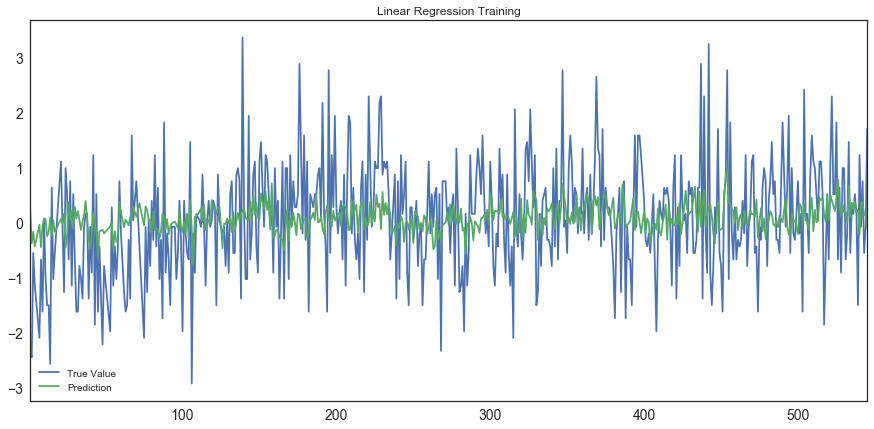

adj train r^2 = 0.019185703129296905
train mse = 0.9722076506444102


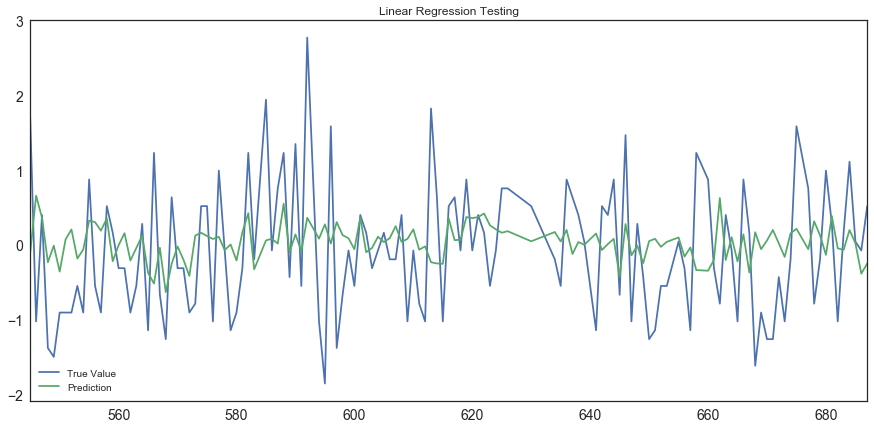

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS']
adj test r^2 = -0.059931024191188564
test mse = 0.7628458105930184


In [207]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Extra Trees

In [208]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

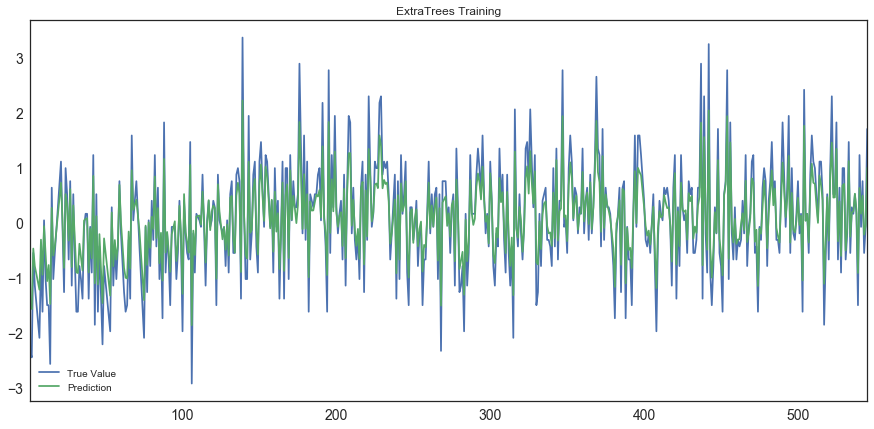

adj train r^2 = 0.8598738310069077
train mse = 0.1388965617499912


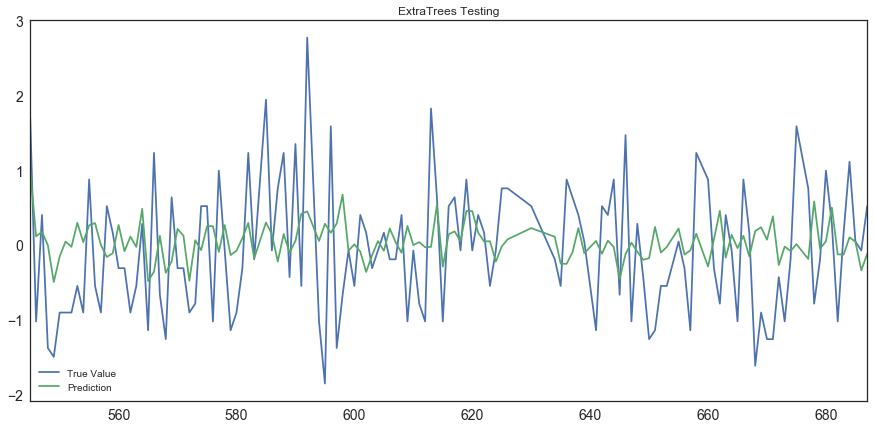

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS']
adj test r^2 = -0.06279196029107958
test mse = 0.7649048626146738


In [209]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

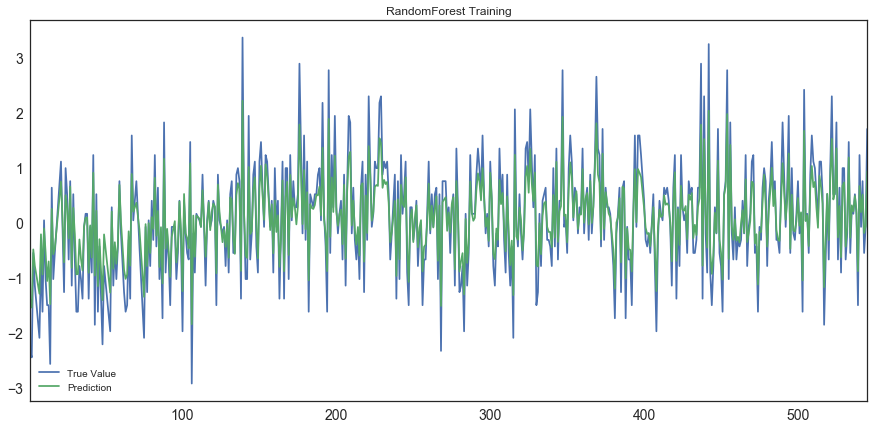

adj train r^2 = 0.8546917221115324
train mse = 0.14403319763573466


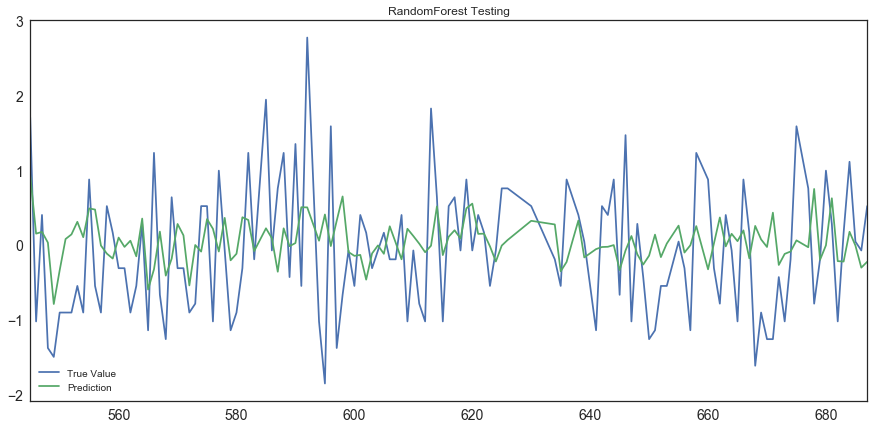

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS']
adj test r^2 = -0.06258539091376081
test mse = 0.7647561920120707


In [211]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### XGBoost

In [212]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

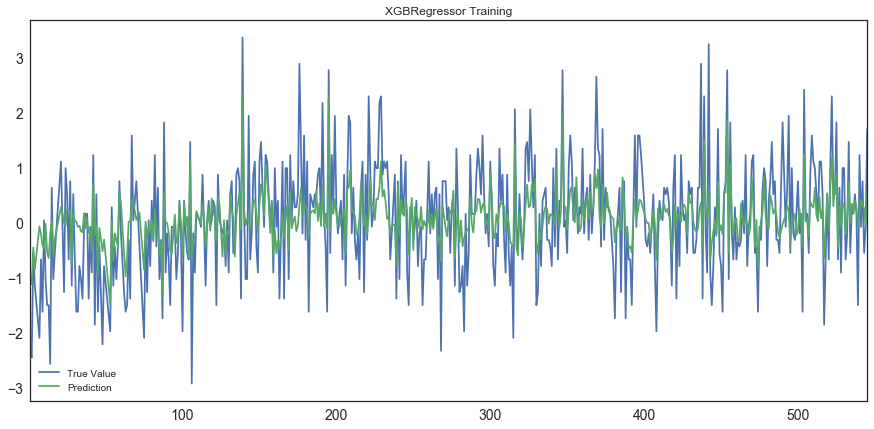

adj train r^2 = 0.45619866867827497
train mse = 0.5390294742117647


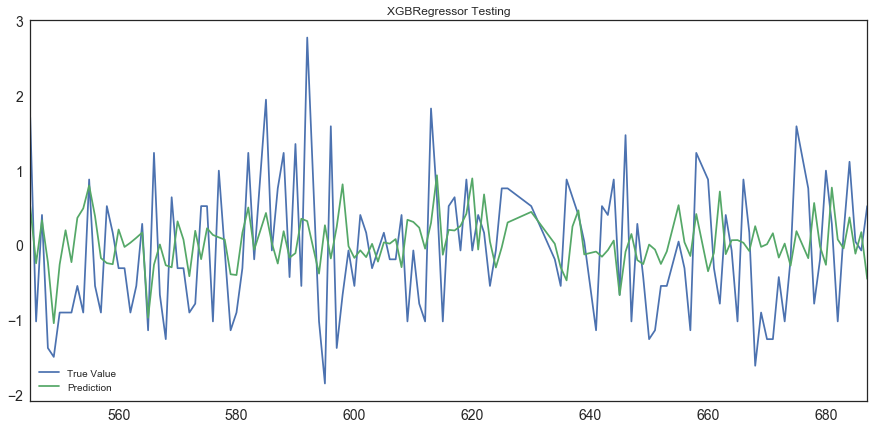

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS']
adj test r^2 = -0.05101138287022522
test mse = 0.7564262315275962


In [213]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Neural Net

In [214]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [215]:
model = Sequential()
model.add(Dense(228, input_dim=20, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dropout(0.02))
#model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=50,verbose=1,shuffle=False)

Train on 521 samples, validate on 131 samples
Epoch 1/50
521/521 [==============================] - 1s 1ms/step - loss: 5.5110 - val_loss: 4.5567
Epoch 2/50
521/521 [==============================] - 0s 73us/step - loss: 4.3972 - val_loss: 3.7450
Epoch 3/50
521/521 [==============================] - 0s 71us/step - loss: 3.6268 - val_loss: 3.0541
Epoch 4/50
521/521 [==============================] - 0s 66us/step - loss: 3.0061 - val_loss: 2.5327
Epoch 5/50
521/521 [==============================] - 0s 66us/step - loss: 2.5235 - val_loss: 2.1309
Epoch 6/50
521/521 [==============================] - 0s 64us/step - loss: 2.1527 - val_loss: 1.8209
Epoch 7/50
521/521 [==============================] - 0s 67us/step - loss: 1.8675 - val_loss: 1.5839
Epoch 8/50
521/521 [==============================] - 0s 69us/step - loss: 1.6484 - val_loss: 1.4031
Epoch 9/50
521/521 [==============================] - 0s 69us/step - loss: 1.4814 - val_loss: 1.2656
Epoch 10/50
521/521 [=========================

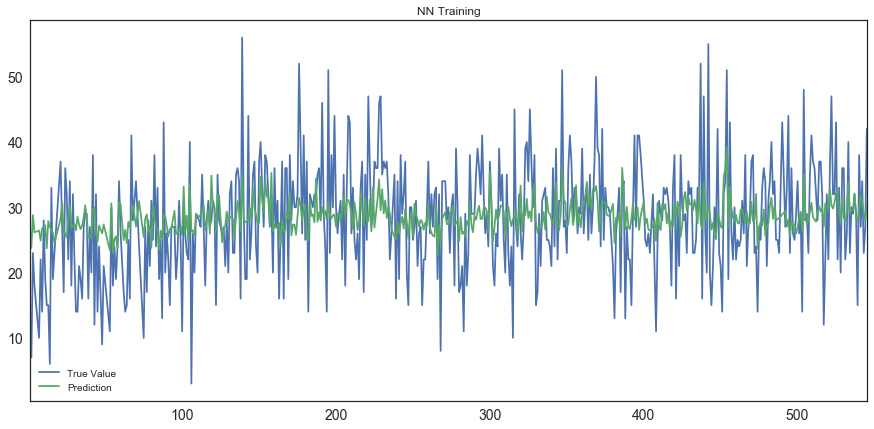

adj train r^2 = 0.17852484087248555
train mse = 0.8142667139602126


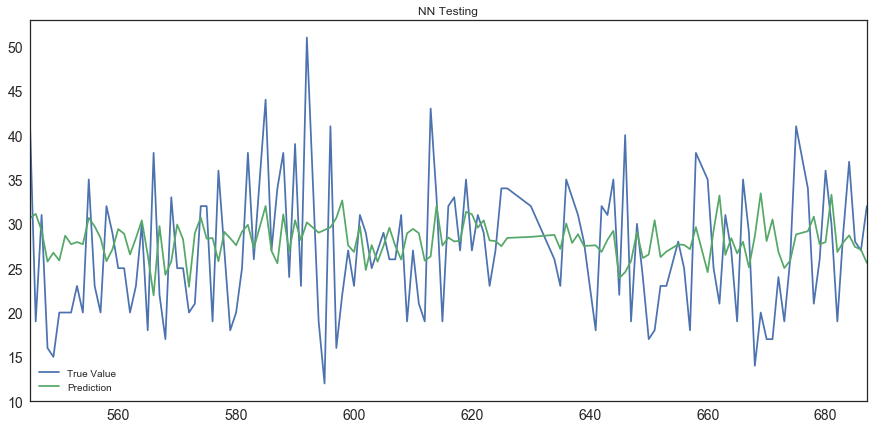

adj test r^2 = -0.08604817419974009
test mse = 55.44155369778465


In [216]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### LSTM

In [220]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [224]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(600, activation='relu',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=50, verbose=1, shuffle=False)

Train on 521 samples, validate on 131 samples
Epoch 1/50
521/521 [==============================] - 14s 26ms/step - loss: 1.0447 - val_loss: 0.7590
Epoch 2/50
521/521 [==============================] - 6s 12ms/step - loss: 1.0238 - val_loss: 0.7758
Epoch 3/50
521/521 [==============================] - 7s 13ms/step - loss: 0.9765 - val_loss: 0.7760
Epoch 4/50
521/521 [==============================] - 7s 14ms/step - loss: 0.9067 - val_loss: 0.8191
Epoch 5/50
521/521 [==============================] - 7s 13ms/step - loss: 0.8021 - val_loss: 1.0073
Epoch 6/50
521/521 [==============================] - 7s 13ms/step - loss: 0.7321 - val_loss: 0.8977
Epoch 7/50
521/521 [==============================] - 6s 12ms/step - loss: 0.6369 - val_loss: 1.1864
Epoch 8/50
521/521 [==============================] - 6s 12ms/step - loss: 0.5971 - val_loss: 1.1148
Epoch 9/50
521/521 [==============================] - 7s 13ms/step - loss: 0.5505 - val_loss: 1.0284
Epoch 10/50
521/521 [=======================

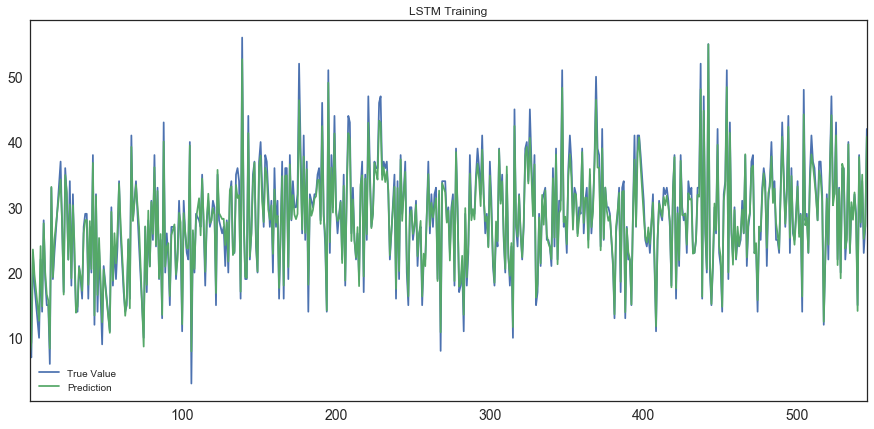

adj train r^2 = 0.9678158138746544
train mse = 0.03190176986678799


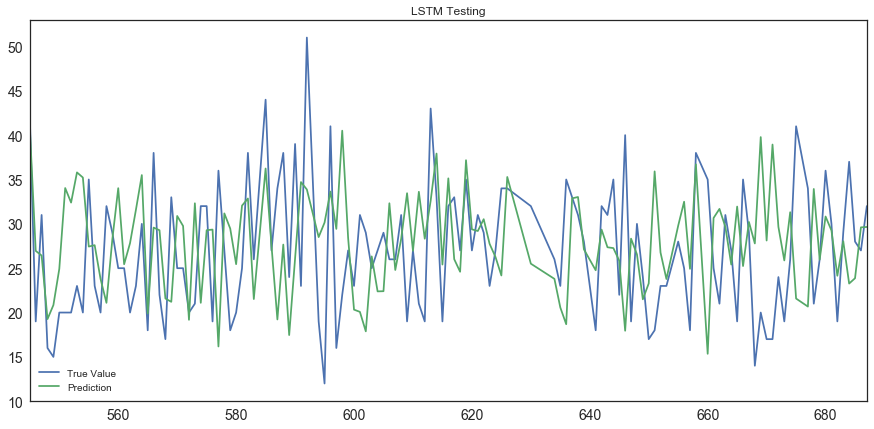

adj test r^2 = -0.5830212549245883
test mse = 80.81147779131086


In [225]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### TPOT

In [227]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=5, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())

Generation 1 - Current best internal CV score: -1.07815187049444
Generation 2 - Current best internal CV score: -1.0691078761942112
Generation 3 - Current best internal CV score: -1.0691078761942112
Generation 4 - Current best internal CV score: -1.053195199307914
Generation 5 - Current best internal CV score: -1.053195199307914
Generation 6 - Current best internal CV score: -1.0527931321329118
Generation 7 - Current best internal CV score: -1.0527931321329116
Generation 8 - Current best internal CV score: -1.0527064586949713
Generation 9 - Current best internal CV score: -1.0527064586949713
Generation 10 - Current best internal CV score: -1.0527064586949713
Generation 11 - Current best internal CV score: -1.0527064586949713
Generation 12 - Current best internal CV score: -1.0527064586949713
Generation 13 - Current best internal CV score: -1.0527064586949713
Generation 14 - Current best internal CV score: -1.0527064586949713
Generation 15 - Current best internal CV score: -1.0527064586

Generation 122 - Current best internal CV score: -1.0179121780302933
Generation 123 - Current best internal CV score: -1.0179121780302933
Generation 124 - Current best internal CV score: -1.0179121780302933
Generation 125 - Current best internal CV score: -1.0179121780302933
Generation 126 - Current best internal CV score: -1.0179121780302933
Generation 127 - Current best internal CV score: -1.0179121780302933
Generation 128 - Current best internal CV score: -1.0179121780302933
Generation 129 - Current best internal CV score: -1.0179121780302933
Generation 130 - Current best internal CV score: -1.0179121780302933
Generation 131 - Current best internal CV score: -1.0179121780302933
Generation 132 - Current best internal CV score: -1.0179121780302933
Generation 133 - Current best internal CV score: -1.0179121780302933
Generation 134 - Current best internal CV score: -1.0179121780302933
Generation 135 - Current best internal CV score: -1.0179121780302933
Generation 136 - Current best inte

Generation 241 - Current best internal CV score: -1.0171272898321693
Generation 242 - Current best internal CV score: -1.0171272898321693
Generation 243 - Current best internal CV score: -1.0171272898321693
Generation 244 - Current best internal CV score: -1.016080060367147
Generation 245 - Current best internal CV score: -1.0142151274769537
Generation 246 - Current best internal CV score: -1.0142151274769537
Generation 247 - Current best internal CV score: -1.0112373559286478
Generation 248 - Current best internal CV score: -1.0092569991168254
Generation 249 - Current best internal CV score: -1.0092569991168254
Generation 250 - Current best internal CV score: -1.0080420499158158
Generation 251 - Current best internal CV score: -1.0068730816682634
Generation 252 - Current best internal CV score: -1.0068730816682634
Generation 253 - Current best internal CV score: -1.0068730816682634
Generation 254 - Current best internal CV score: -1.0068730816682634
Generation 255 - Current best inter

Generation 361 - Current best internal CV score: -1.0047403643429162
Generation 362 - Current best internal CV score: -1.0047403643429162
Generation 363 - Current best internal CV score: -1.0047403643429162
Generation 364 - Current best internal CV score: -1.0047403643429162
Generation 365 - Current best internal CV score: -1.0047403643429162
Generation 366 - Current best internal CV score: -1.0047403643429162
Generation 367 - Current best internal CV score: -1.0047403643429162
Generation 368 - Current best internal CV score: -1.0047403643429162
Generation 369 - Current best internal CV score: -1.0047403643429162
Generation 370 - Current best internal CV score: -1.0047403643429162
Generation 371 - Current best internal CV score: -1.0047403643429162
Generation 372 - Current best internal CV score: -1.0047403643429162
Generation 373 - Current best internal CV score: -1.0047403643429162
Generation 374 - Current best internal CV score: -1.0047403643429162
Generation 375 - Current best inte

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


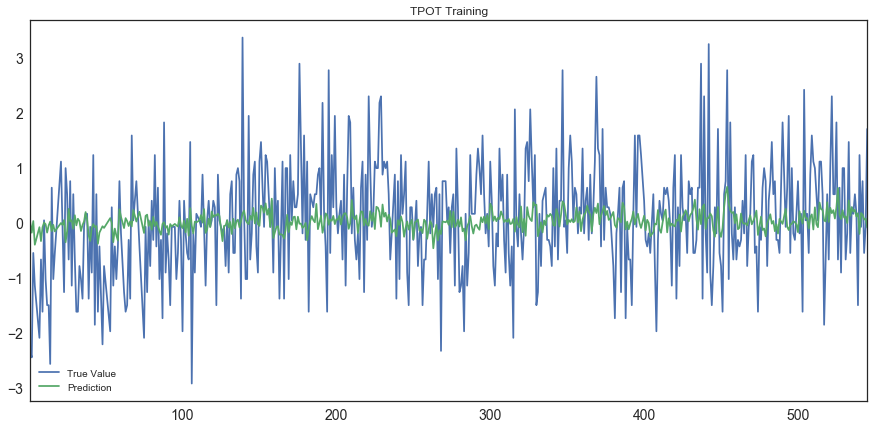

adj train r^2 = 0.004802689042892161
train mse = 0.9864644537708968


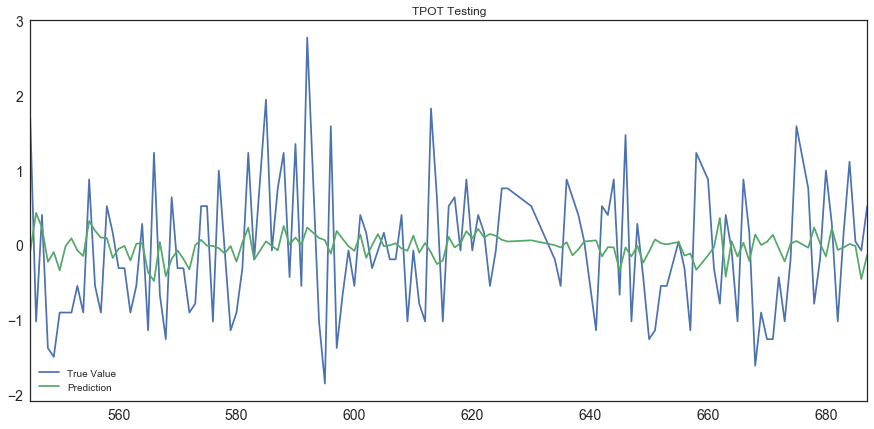

adj test r^2 = -0.0496204734411263
test mse = 0.7554251763582639


In [228]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, train_y2.prediction)))
test_y['PredPts'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))